# Train film posters into a fcNN to predict the genre

## Prepare data

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from PIL import Image
import os
import pathlib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import optimizers

In [80]:
# Set directory where the images are stored
data_dir_overall = "/Users/sis/Documents/ZHAW/CAS_MAIN_2020.4/02_Deep_Learning/dl_project_imdb/categorised_pics_genre"

# data_set_type = train | validate | test
def prepare_data_set(data_set_type):
    
    # Read in train data
    data_dir = pathlib.Path(data_dir_overall + "/" + data_set_type)
    
    class_names = np.array([item.name for item in data_dir.glob('*')])
    
    print("Detected categories: {} \n".format(class_names))
    
    #Image count
    image_count = len(list(data_dir.glob('*/*.jpg')))
    print("There are",image_count,"movie posters in the training set.\n")
    
    #Define way to load images - already normalize here -> Batch size can be adapted
    image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    
    BATCH_SIZE = 50
    IMG_HEIGHT = 150
    IMG_WIDTH = 101
    STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
    
    #Load images 
    train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode = "sparse",
                                                     classes = list(class_names))
    
    print("")
    
    return class_names, train_data_gen

In [81]:
train_class_names, train_data_gen = prepare_data_set("train")
val_class_names, val_data_gen = prepare_data_set("validate")
test_class_names, test_data_gen = prepare_data_set("test")

Detected categories: ['Musical' 'Music' 'Documentary' 'Biography' 'Western' '.DS_Store'
 'Romance' 'Sci-Fi' 'Family' 'Animation' 'Mystery' 'Comedy' 'Sport'
 'Adventure' 'Horror' 'Action' 'News' 'War' 'History' 'Thriller' 'Adult'
 'Crime' 'Fantasy' 'Drama'] 

There are 600 movie posters in the training set.

Found 600 images belonging to 24 classes.

Detected categories: ['Music' 'Documentary' 'Biography' 'Western' 'Romance' 'Family' 'Mystery'
 'Comedy' 'Adventure' 'Horror' 'Action' 'War' 'History' 'Thriller' 'Crime'
 'Fantasy' 'Drama'] 

There are 200 movie posters in the training set.

Found 200 images belonging to 17 classes.

Detected categories: ['Musical' 'Music' 'Documentary' 'Biography' 'Western' 'Romance' 'Sci-Fi'
 'Family' 'Animation' 'Mystery' 'Comedy' 'Sport' 'Adventure' 'Horror'
 'Action' 'History' 'Thriller' 'Crime' 'Fantasy' 'Drama'] 

There are 200 movie posters in the training set.

Found 200 images belonging to 20 classes.



## Show 12 random movie posters from all 3 sets

################################
12 posters from the training set
################################


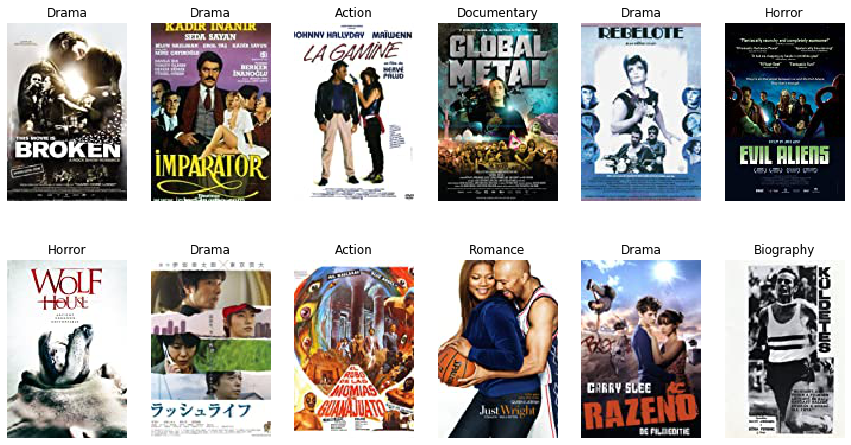

################################
12 posters from the validation set
################################


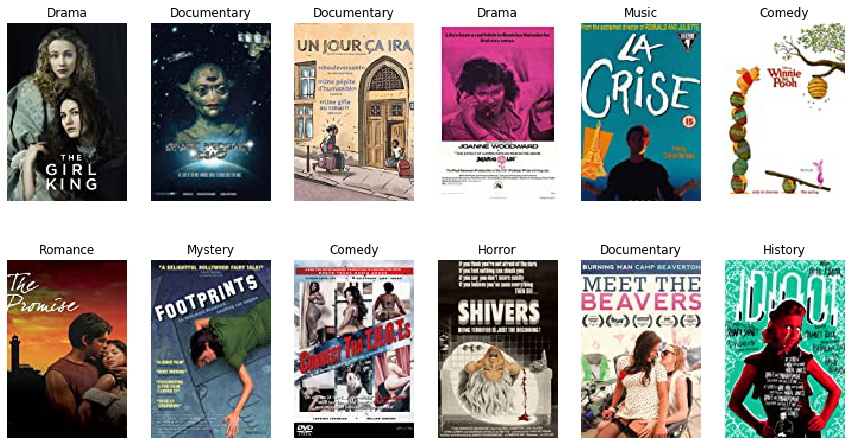

################################
12 posters from the test set
################################


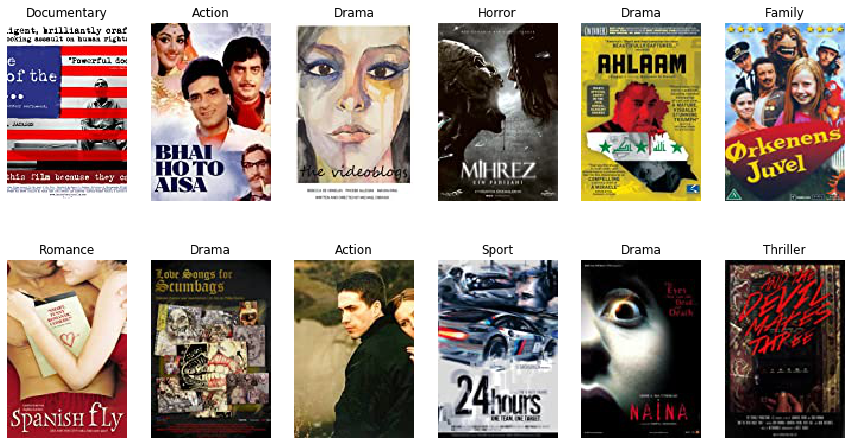

In [85]:
def show_batch(image_batch, label_batch, class_names):
  plt.figure(figsize=(15,8))
  for n in range(12):
      ax = plt.subplot(2,6,n+1)
      plt.imshow(image_batch[n])
      plt.title(class_names[int(label_batch[n])])
      plt.axis('off')
  plt.show()

print("################################")
print("12 posters from the training set")
print("################################")
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch, train_class_names)

print("################################")
print("12 posters from the validation set")
print("################################")
image_batch, label_batch = next(val_data_gen)
show_batch(image_batch, label_batch, val_class_names)

print("################################")
print("12 posters from the test set")
print("################################")
image_batch, label_batch = next(test_data_gen)
show_batch(image_batch, label_batch, test_class_names)

## Train the model

In [49]:
#Size of movie poster
IMG_HEIGHT = 150
IMG_WIDTH = 101

#Model from cifar example with dropout
model  =  Sequential()

model.add(Convolution2D(16,(3,3),activation="relu",padding="same",input_shape=(150,101,3)))
model.add(Convolution2D(16,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Convolution2D(32,(3,3),activation="relu",padding="same"))
model.add(Convolution2D(32,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(6))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 101, 16)      448       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 150, 101, 16)      2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 50, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 50, 32)        4640      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 25, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 29600)            

In [50]:
#Train the Model with 10 epochs
epochs=10

history=model.fit(train_data_gen, 
                  epochs=epochs,
                  verbose=1, 
                  validation_data=(val_data_gen)
                 )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 12 steps, validate for 4 steps
Epoch 1/10
12/12 [==============================] - 15s 1s/step - loss: 16781.2565 - accuracy: 0.1817 - val_loss: 100518.3184 - val_accuracy: 0.0000e+00
Epoch 2/10
12/12 [==============================] - 13s 1s/step - loss: 2213693.9089 - accuracy: 0.0367 - val_loss: 8339180.2500 - val_accuracy: 0.0000e+00
Epoch 3/10
12/12 [==============================] - 13s 1s/step - loss: 81528101.0833 - accuracy: 0.1533 - val_loss: 236068956.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
12/12 [==============================] - 14s 1s/step - loss: 1574011458.6667 - accuracy: 0.6350 - val_loss: 3851292032.0000 - val_accuracy: 1.0000
Epoch 5/10
12/12 [==============================] - 14s 1s/step - loss: 18799666048.0000 - accuracy: 0.9867 - val_loss: 40172789760.0000 - val_accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 14s 1s/step - loss: 151222742698.6667 - accuracy: 1.0000 - val_loss: 28

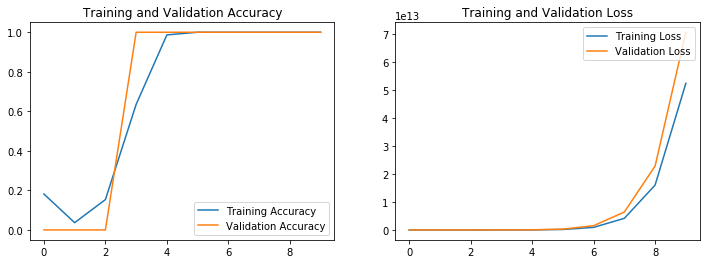

  ...
    to  
  ['...']
4/4 [==============================] - 1s 316ms/step - loss: 86937639583744.0000 - accuracy: 1.0000
test loss, test acc: [86937639583744.0, 1.0]


In [51]:
#Show the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [55]:
#Check with test dataset
results = model.evaluate(test_data_gen)
print('test loss, test acc:', results)

  ...
    to  
  ['...']
4/4 [==============================] - 1s 205ms/step - loss: 86937639583744.0000 - accuracy: 1.0000
test loss, test acc: [86937639583744.0, 1.0]
